# CS 584 :: Data Mining :: George Mason University :: Fall 2022


# Homework 2: Linear Regression&Neural Networks

- **100 points [9% of your final grade]**
- **Due Friday, October 14 by 11:59pm**

- *Goals of this homework:* (1) implement the linear regression model; (2) implement the multi-layer perceptron neural network; (3) tune the hyperparameters of MLP model to produce classification result as good as possible.

- *Submission instructions:* for this homework, you need to submit to two different platforms. First, you should submit your notebook file to Blackboard (look for the homework 2 assignment there). Please name your submission **FirstName_Lastname_hw2.ipynb**, so for example, my submission would be something like **Ziwei_Zhu_hw2.ipynb**. Your notebook should be **fully executed** so that we can see all outputs. Then, you need to submit a output file from this notebook (you will see later in this notebook) to the HW2 page in the http://miner2.vsnet.gmu.edu website.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Part 1: Linear Regression (40 points)

Recent studies have found that novel mobile games can lead to increased physical activity. A notable example is Pokemon Go, a mobile game combining the Pokemon world through augmented reality with the real world requiring players to physically move around. Specifically, in the following study, researchers have found that Pokemon Go leads to increased levels of physical activity for the most engaged players! https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5174727/
![image.png](attachment:image.png)



In this part, our goal is to predict the combat point of each pokemon in the 2017 Pokemon Go mobile game. Each pokemon has its own unique attributes that can help predicting its combat points. These include:

- Stamina
- Attack value
- Defense value
- Capture rate
- Flee rate
- Spawn chance
- Primary strength

The file pokemon_data.csv contains data of 146 pokemons to be used in this homework. The rows of these files refer to the data samples (i.e., pokemon samples), while the columns denote the name of the pokemon (column 1), its attributes (columns 2-8), and the combat point outcome (column 9). You can ignore column 1 for the rest of this problem.

First, let's load the data by excuting the following code.

**Note: you need to install the pandas library beforehand**

In [5]:
import numpy as np
import pandas as pd

data_frame = pd.read_csv('/content/drive/MyDrive/pokemon_data.csv')
data_frame.head()

,name,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,primary_strength,combat_point
0,Bulbasaur,90,126,126,0.16,0.10,69.0,Grass,1079
1,Ivysaur,120,156,158,0.08,0.07,4.2,Grass,1643
2,Venusaur,160,198,200,0.04,0.05,1.7,Grass,2598
3,Charmander,78,128,108,0.16,0.10,25.3,Fire,962
4,Charmeleon,116,160,140,0.08,0.07,1.2,Fire,1568


In [6]:
data_frame.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              146 non-null    object 
 1   stamina           146 non-null    int64  
 2   attack_value      146 non-null    int64  
 3   defense_value     146 non-null    int64  
 4   capture_rate      146 non-null    float64
 5   flee_rate         146 non-null    float64
 6   spawn_chance      146 non-null    float64
 7   primary_strength  146 non-null    object 
 8   combat_point      146 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 10.4+ KB


Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of Python. By excuting the following code, let's create one Numpy array to contain the feature data without the name column and one array to contain the combat point ground truth.

In [7]:
features = data_frame.values[:, 1:-1]
labels = data_frame.values[:, -1]
print('array of labels: shape ' + str(np.shape(labels)))
print('array of feature matrix: shape ' + str(np.shape(features)))

array of labels: shape (146,)
array of feature matrix: shape (146, 7)


In [8]:
features

array([[90, 126, 126, ..., 0.1, 69.0, 'Grass'],
       [120, 156, 158, ..., 0.07, 4.2, 'Grass'],
       [160, 198, 200, ..., 0.05, 1.7, 'Grass'],
       ...,
       [82, 128, 110, ..., 0.09, 30.0, 'Dragon'],
       [122, 170, 152, ..., 0.06, 2.0, 'Dragon'],
       [182, 250, 212, ..., 0.05, 0.11, 'Dragon']], dtype=object)

In [9]:
y = labels
y

array([1079, 1643, 2598, 962, 1568, 2620, 1015, 1594, 2560, 446, 481,
       1465, 452, 488, 1450, 684, 1232, 2106, 585, 1454, 691, 1758, 830,
       1779, 894, 2042, 804, 1823, 882, 1414, 2502, 849, 1382, 2492, 1209,
       2414, 837, 2203, 924, 2192, 647, 1935, 1156, 1701, 2510, 923, 1759,
       1036, 1903, 460, 1176, 761, 1643, 1117, 2403, 884, 1877, 1344,
       3005, 801, 1350, 2523, 604, 1140, 1826, 1097, 1773, 2612, 1125,
       1736, 2548, 911, 2236, 855, 1443, 2319, 1526, 2215, 1227, 2615,
       897, 1893, 1272, 861, 1849, 1114, 2161, 1293, 2621, 828, 2067, 810,
       1390, 2093, 863, 1082, 2199, 797, 1836, 845, 1657, 1107, 2976,
       1013, 1668, 1503, 1527, 1638, 1160, 2266, 1190, 2259, 679, 1752,
       2057, 800, 1725, 972, 2058, 944, 2197, 1505, 2088, 1728, 2134,
       2281, 2137, 1857, 264, 2708, 3002, 926, 1084, 2836, 2155, 2662,
       1703, 1127, 2249, 1112, 2145, 2180, 3135, 990, 1760, 3525],
      dtype=object)

In [10]:
# adding column names
data_f = pd.DataFrame(features, columns= ['stamina',	'attack_value',	'defense_value',	'capture_rate',	'flee_rate',	'spawn_chance','primary_strength'	])
 
# printing data frame
print("Data frame")
print(data_f)
 
# printing row header
print("Row header")
 
print(list(data_f.columns))


Data frame
    stamina attack_value defense_value capture_rate flee_rate spawn_chance  \
0        90          126           126         0.16       0.1         69.0   
1       120          156           158         0.08      0.07          4.2   
2       160          198           200         0.04      0.05          1.7   
3        78          128           108         0.16       0.1         25.3   
4       116          160           140         0.08      0.07          1.2   
..      ...          ...           ...          ...       ...          ...   
141     160          182           162         0.16      0.09          1.8   
142     320          180           180         0.16      0.09          1.6   
143      82          128           110         0.32      0.09         30.0   
144     122          170           152         0.08      0.06          2.0   
145     182          250           212         0.04      0.05         0.11   

    primary_strength  
0              Grass  
1     

In [11]:
# adding column names
data_f2 = pd.DataFrame(y, columns= ['combat_point'	])
 
# printing data frame
print("Data frame2")
print(data_f2)
 
# printing row header
print("Row header")
 
print(list(data_f2.columns))





Data frame2
    combat_point
0           1079
1           1643
2           2598
3            962
4           1568
..           ...
141         2180
142         3135
143          990
144         1760
145         3525

[146 rows x 1 columns]
Row header
['combat_point']


Now, you may find out that we have a categorical feature 'primary_strength' in our data. Categorical features require special attention because usually they cannot be the input of regression models as they are. A potential way to treat categorical features is to simply convert each value of the feature to a separate number. However, this might impute non-existent relative associations between the features, which might not always be representative of the data (e.g., if we assign “1” to the value “green” and “2” to the value “red”, the regression algorithm will assume that “red” is greater than “green,” which is not necessarily the case). For this reason, we can use a “one hot encoding” to represent categorical features. According to this, we will create a binary column for each category of the categorical feature, which will take a value of 1 if the sample belongs to that category, and 0 otherwise. For each categorical feature of the problem, count the number of different values and implement the one hot encoding. For the remaining of the problem, you will be working with the one hot encoding of the categorical features.


In the next cell, write your code to replace the categorical feature 'primary_strength' with one-hot encoding and generate the new version of the Numpy array 'features'.

**Hint: if you don't remember one hot encoding, review the slides of our first lecture.**

**Note: do not use sklearn to automatically generate one hot encoding.**

In [12]:
data_f['primary_strength'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon'], dtype=object)

In [13]:
### Categorical data to be converted to numeric data
unique_v = ['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon']

### Universal list of unique_values
total_unique_v = ['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon']

### map each unique_v to an integer
mapping = {}
for x in range(len(total_unique_v)):
  mapping[total_unique_v[x]] = x

one_hot_encode = []

for c in unique_v:
  arr = list(np.zeros(len(total_unique_v), dtype = int))
  arr[mapping[c]] = 1
  one_hot_encode.append(arr)

print(one_hot_encode)


[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]


In [14]:
data_f1 = pd.DataFrame(one_hot_encode, columns= ['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon'	])
 
# printing data frame
print("Data frame")
print(data_f1)
 
# printing row header
print("Row header")
 
print(list(data_f1.columns))

Data frame
    Grass  Fire  Water  Bug  Normal  Poison  Electric  Ground  Fairy  \
0       1     0      0    0       0       0         0       0      0   
1       0     1      0    0       0       0         0       0      0   
2       0     0      1    0       0       0         0       0      0   
3       0     0      0    1       0       0         0       0      0   
4       0     0      0    0       1       0         0       0      0   
5       0     0      0    0       0       1         0       0      0   
6       0     0      0    0       0       0         1       0      0   
7       0     0      0    0       0       0         0       1      0   
8       0     0      0    0       0       0         0       0      1   
9       0     0      0    0       0       0         0       0      0   
10      0     0      0    0       0       0         0       0      0   
11      0     0      0    0       0       0         0       0      0   
12      0     0      0    0       0       0         0

In [15]:
features_df = pd.concat([data_f, data_f1], axis=1).drop('primary_strength', axis=1)
features_df.head()

,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,Grass,Fire,Water,Bug,...,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon
0,90,126,126,0.16,0.1,69.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,120,156,158,0.08,0.07,4.2,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,160,198,200,0.04,0.05,1.7,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,78,128,108,0.16,0.1,25.3,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,116,160,140,0.08,0.07,1.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
features_df.tail()

,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,Grass,Fire,Water,Bug,...,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon
141,160,182,162,0.16,0.09,1.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,320,180,180,0.16,0.09,1.6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,82,128,110,0.32,0.09,30.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,122,170,152,0.08,0.06,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,182,250,212,0.04,0.05,0.11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Replace nan values with 0
features_df=features_df.replace(np.nan,0)
features_df

,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,Grass,Fire,Water,Bug,...,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon
0,90,126,126,0.16,0.1,69.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,120,156,158,0.08,0.07,4.2,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,160,198,200,0.04,0.05,1.7,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,78,128,108,0.16,0.1,25.3,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,116,160,140,0.08,0.07,1.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,160,182,162,0.16,0.09,1.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142,320,180,180,0.16,0.09,1.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143,82,128,110,0.32,0.09,30.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144,122,170,152,0.08,0.06,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
data_f2

,combat_point
0,1079
1,1643
2,2598
3,962
4,1568
...,...
141,2180
142,3135
143,990
144,1760


In [19]:
features_df

,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,Grass,Fire,Water,Bug,...,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon
0,90,126,126,0.16,0.1,69.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,120,156,158,0.08,0.07,4.2,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,160,198,200,0.04,0.05,1.7,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,78,128,108,0.16,0.1,25.3,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,116,160,140,0.08,0.07,1.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,160,182,162,0.16,0.09,1.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142,320,180,180,0.16,0.09,1.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143,82,128,110,0.32,0.09,30.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144,122,170,152,0.08,0.06,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Besides, you may also notice that other features have different scales. So, you need to standardize them: $({x-\mu})/{\sigma}$, where $\mu$ is the mean and $\sigma$ is the standard deviation. Write your code below.

**Hint: details about feature standardization is also in slides of our first lecture.**

In [20]:
#define predictor variable columns
df_x = features_df[['stamina',	'attack_value',	'defense_value',	'capture_rate',	'flee_rate',	'spawn_chance'	]]

#feature standardization of the values for each predictor variable
features_df[['stamina',	'attack_value',	'defense_value',	'capture_rate',	'flee_rate',	'spawn_chance']] = (df_x-df_x.mean())/df_x.std()

#view new data frame
features_df

,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,Grass,Fire,Water,Bug,...,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon
0,-0.637824,-0.551292,-0.479697,-0.579022,0.066461,-0.03378,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.110717,0.191223,0.364744,-1.23182,-0.297413,-0.360226,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.592093,1.230744,1.473072,-1.558218,-0.539996,-0.372821,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.848667,-0.501791,-0.954695,-0.579022,0.066461,-0.25393,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.180998,0.290225,-0.110254,-1.23182,-0.297413,-0.37534,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0.592093,0.834736,0.470299,-0.579022,-0.05483,-0.372317,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142,3.403334,0.785235,0.945297,-0.579022,-0.05483,-0.373325,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143,-0.778386,-0.501791,-0.901918,0.726572,-0.05483,-0.230252,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144,-0.075576,0.53773,0.206411,-1.23182,-0.418705,-0.37131,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#standardize the values of last column
y_pred = (data_f2-data_f2.mean())/data_f2.std()

#view new data frame
y_pred



,combat_point
0,-0.72272
1,0.094714
2,1.478844
3,-0.892294
4,-0.013987
...,...
141,0.873016
142,2.257146
143,-0.851712
144,0.264288


In [22]:
print("Dataset shape: ", features_df.shape, y_pred.shape)


Dataset shape:  (146, 21) (146, 1)


In [23]:
# concatenating features and target.
df_reg = pd.concat([features_df, y_pred], axis=1)
df_reg.head() # looking at first 5 observations

,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,Grass,Fire,Water,Bug,...,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,combat_point
0,-0.637824,-0.551292,-0.479697,-0.579022,0.066461,-0.03378,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.72272
1,-0.110717,0.191223,0.364744,-1.23182,-0.297413,-0.360226,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.094714
2,0.592093,1.230744,1.473072,-1.558218,-0.539996,-0.372821,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.478844
3,-0.848667,-0.501791,-0.954695,-0.579022,0.066461,-0.25393,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.892294
4,-0.180998,0.290225,-0.110254,-1.23182,-0.297413,-0.37534,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.013987


Now, in the next cell, you need to implement your own linear regression model using the Ordinary Least Square (OLS) solution without regularization. And here, you should adopt the **5-fold cross-validation** method. For each fold compute and print out the square root of the residual sum of squares error (RSS) between the actual and predicted outcome variable. Also compute and print out the average square root of the RSS over all folds.

**Note: You should implement the algorithm by yourself. You are NOT allowed to use Machine Learning libraries like Sklearn.**

**Hint: do not forget the bias term in the linear regression model.**

In [24]:
# Write your code here
# Ordinary Least Square (OLS) solution

#initializing our inputs and outputs
X = df_reg['attack_value'].values
Y = df_reg['combat_point'].values

#mean of our inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)

#total number of values
n = len(X)

#using the formula to calculate the b1 and b0
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)

#printing the coefficient or ratio of the standard deviation to the mean
print('Ratio of the standard deviation to the mean ',b1, b0)

Ratio of the standard deviation to the mean  0.9075315401042728 -2.491069197095198e-16


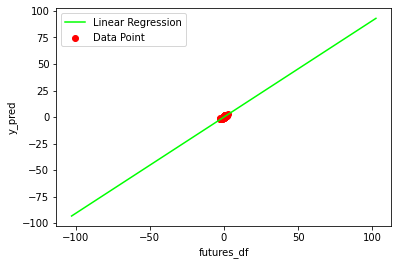

In [25]:
#plotting values of ols Linear Regression
import matplotlib.pyplot as plt
x_max = np.max(X) + 100
x_min = np.min(X) - 100

#calculating line values of x and y
x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x

#plotting line 
plt.plot(x, y, color='#00ff00', label='Linear Regression')

#plot the data point
plt.scatter(X, Y, color='#ff0000', label='Data Point')

# x-axis label
plt.xlabel('futures_df')

#y-axis label
plt.ylabel('y_pred')

plt.legend()
plt.show()

In [26]:
# calculating Root Mean Squares Error 
rmse = 0
for i in range(n):
    y_pred=  b0 + b1* X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)
print(rmse)

0.4185431602334283


In [27]:
 #5-fold cross-validation method.
k = 5
crs_vld_begin = 0
crs_vld_end = 90
test_begin = df_reg
test_end = df_reg


for fold in range(k):
    print(f"FOLD {fold + 1}", end=": ")

    val_end = crs_vld_end - fold*(100/k-1)
    val_start = val_end - 100/k + 1

    if val_end == crs_vld_end:
        train_start = crs_vld_begin
        train_end = val_start
        print(f"Training {train_start}% to {train_end}%")
    elif val_start == crs_vld_begin:
        train_start = val_end
        train_end = crs_vld_end
        print(f"Training {train_start}% to {train_end}%")
    else:
        train_start = crs_vld_begin
        train_mid1 = val_start
        train_mid2 = val_end
        train_end = crs_vld_end
        print(f"Training {train_start}% to {train_mid1}% "
                + f" and {train_mid2} to {train_end}%")


    print(f"\tValidating {val_start}% to {val_end}%\n")

print(f"\nTesting samples from {test_begin}% to {test_end}%")

FOLD 1: Training 0% to 71.0%
	Validating 71.0% to 90.0%

FOLD 2: Training 0% to 52.0%  and 71.0 to 90%
	Validating 52.0% to 71.0%

FOLD 3: Training 0% to 33.0%  and 52.0 to 90%
	Validating 33.0% to 52.0%

FOLD 4: Training 0% to 14.0%  and 33.0 to 90%
	Validating 14.0% to 33.0%

FOLD 5: Training 0% to -5.0%  and 14.0 to 90%
	Validating -5.0% to 14.0%


Testing samples from       stamina attack_value defense_value capture_rate flee_rate spawn_chance  \
0   -0.637824    -0.551292     -0.479697    -0.579022  0.066461     -0.03378   
1   -0.110717     0.191223      0.364744     -1.23182 -0.297413    -0.360226   
2    0.592093     1.230744      1.473072    -1.558218 -0.539996    -0.372821   
3   -0.848667    -0.501791     -0.954695    -0.579022  0.066461     -0.25393   
4   -0.180998     0.290225     -0.110254     -1.23182 -0.297413     -0.37534   
..        ...          ...           ...          ...       ...          ...   
141  0.592093     0.834736      0.470299    -0.579022  -0.05483  

At the end in this part, please repeat the same experiment as in the previous step, but instead of linear regression, implement linear regression with l2-norm regularization. Experiment and report your results with different values of the regularization term $\lambda=\{1, 0.1, 0.01, 0.001, 0.0001\}$.

In [28]:
# Ridge Regression or L2 Normalization from scratch

class RidgeRegression() :
	
	def __init__( self, learning_rate, iterations, l2_penality ) :
		
		self.learning_rate = learning_rate		
		self.iterations = iterations		
		self.l2_penality = l2_penality
		
	# Function for model training			
	def fit( self, features_df, Y_pred ) :
		
		# no_of_training_examples, no_of_features		
		self.m, self.n = features_df.shape
		
		# weight initialization		
		self.W = np.zeros( self.n )
		
		self.b = 0.1		
		self.X = X		
		self.Y = Y
		
		# gradient descent learning
				
		for i in range( self.iterations ) :			
			self.update_weights()			
		return self
	
	# Helper function to update weights in gradient descent
	
	def update_weights( self ) :		
		Y_pred = self.predict( self.X )
		
		# calculate gradients	
		dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +			
			( 2 * self.l2_penality * self.W ) ) / self.m	
		db = - 2 * np.sum( self.Y - Y_pred ) / self.m
		
		# update weights	
		self.W = self.W - self.learning_rate * dW	
		self.b = self.b - self.learning_rate * db		
		return self
	
	# Hypothetical function h( x )
	def predict( self, X ) :	
		return features_df.dot( self.W ) + self.b
	
# Driver code

def main() :
	
	# Importing dataset	
	df = df_reg
	X = df.iloc[:, :-1].values
	Y = df.iloc[:, 1].values	

	# Model training	of L2 Normalization or RidgeRegression
	model = RidgeRegression( iterations = 1000,							
							learning_rate = 0.01, l2_penality = 5 )
	model.fit( X, Y )
	
	# Prediction on test set
	Y_pred = model.predict( X )	
	print( "Predicted values ", Y_pred )	
	print( "Real values of the regularization ", Y )	
	print( "Trained Weight	 ", round( model.W[0], 2 ) )	
	print( "Trained b	 ", round( model.b, 2 ) )

	
if __name__ == "__main__" :
	main()


Predicted values  0     -2.229076
1     -0.925103
2      2.912814
3     -3.677739
4     -1.705496
         ...   
141    1.333193
142    6.806091
143    -3.11782
144   -2.462682
145    4.574148
Length: 146, dtype: object
Real values of the regularization  [-0.5512918830610962 0.19122301478871997 1.2307438717784625
 -0.5017908898711084 0.29022500116869543 1.5772508241083767
 -0.8977988353910104 -0.10578294435120648 0.9337379126385361
 -2.135323665140704 -2.283826644710667 -0.10578294435120648
 -1.9868206855707407 -2.135323665140704 -0.10578294435120648
 -1.3433077741009 -0.5512918830610962 0.5377299671186342
 -1.3928087672908878 -0.05628195116121875 -1.1453038013409491
 0.4882289739286464 -0.8977988353910104 0.43872798073865865
 -0.6007928762510839 1.2802448649684504 -1.4423097604808754
 0.04272003521875674 -1.1948047945309368 -0.40278890349113294
 0.8842369194485483 -0.9472998285809981 -0.15528393754119424
 1.3792468513484257 -0.7987968490110349 0.7357339398785852
 -1.0463018149609735 

## Part 2: Neural Networks (40 points)

In this part, you are going to implement your multi-layer perceptron model by the Pytorch library. You will still use the same handwritten digit image dataset from homework 1. So, in the next few cells, please run the provided code to load and process the data, and creat dataset objects for further use by Pytorch.

In [29]:
import torch, torchvision
from torch import nn
from torch import optim
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import copy


Now, you should have the train_dataloader and vali_dataloader. Then, you need to build and train your multi-layer perceptron model by Pytorch.

https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html gives a comprehansive exampple how to achieve this. Please read this tutorial closely, and implement the model in the next few cells. 

https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/c30c1dcf2bc20119bcda7e734ce0eb42/quickstart_tutorial.ipynb provides the interactive version, which you can run and edit.

**Note: in your implementation:** 
- you will only have three layers [784 -> 512 -> 10], you need to remove the [512 -> 512] layer in the tutorial. 
- add 'weight_decay=1e-4' in torch.optim.SGD to add L2 regularization.
- train the model for 10 epochs instead of 5 epochs
- keep all other hyper-parameters the same as used in the tutorial.


**Note: print out the training process and the final accuracy on the validation set.**

**Note: you can use Colab for running the code with GPU for free (open a colab notebook, then Runtime->Change runtime type->Hardware accelerator->GPU)**

In [30]:
# Write your code

# train_dataloader and vali_dataloader

T = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()])
train_data = torchvision.datasets.MNIST('mnist_data', train=True, download=True, transform=T)
val_data = torchvision.datasets.MNIST('mnist_data', train=False, download=True, transform=T)

numb_batch = 64
train_dl = torch.utils.data.DataLoader(train_data, batch_size = numb_batch)
val_dl = torch.utils.data.DataLoader(val_data, batch_size = numb_batch)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



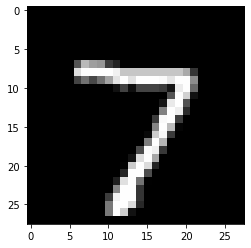

In [31]:
plt.imshow(val_data[0][0][0],cmap="gray")

In [32]:
# you will only have three layers [784 -> 512 -> 10], you need to remove the [512 -> 512] layer 

In [33]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [34]:
# add 'weight_decay=1e-4' in torch.optim.SGD to add L2 regularization
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)


In [35]:
# train the model for 10 epochs instead of 5 epochs
# keep all other hyper-parameters the same as used in the tutorial

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [36]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dl, model, loss_fn, optimizer)
    test(val_dl, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.280338  [    0/60000]
loss: 2.279675  [ 6400/60000]
loss: 2.288128  [12800/60000]
loss: 2.279059  [19200/60000]
loss: 2.285371  [25600/60000]
loss: 2.293998  [32000/60000]
loss: 2.288091  [38400/60000]
loss: 2.271206  [44800/60000]
loss: 2.287427  [51200/60000]
loss: 2.268360  [57600/60000]
Test Error: 
 Accuracy: 13.3%, Avg loss: 2.272268 

Epoch 2
-------------------------------
loss: 2.257786  [    0/60000]
loss: 2.256659  [ 6400/60000]
loss: 2.270010  [12800/60000]
loss: 2.251203  [19200/60000]
loss: 2.263353  [25600/60000]
loss: 2.271400  [32000/60000]
loss: 2.263676  [38400/60000]
loss: 2.253964  [44800/60000]
loss: 2.263594  [51200/60000]
loss: 2.246667  [57600/60000]
Test Error: 
 Accuracy: 16.3%, Avg loss: 2.249678 

Epoch 3
-------------------------------
loss: 2.235522  [    0/60000]
loss: 2.233729  [ 6400/60000]
loss: 2.251816  [12800/60000]
loss: 2.223806  [19200/60000]
loss: 2.241561  [25600/60000]
loss: 2.249079  [32000/600

In [37]:
#save model
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


## Part 3: Tune Hyperparameter [Need to submit to Miner2] (20 points)

In this part, you need to do your best to tune the hyperparameter in the MLP to build the best model and submit the predictions for the testing data to Miner2 system. First of all, let's load the testing data by excuting the following code.

In [39]:
test_features = np.loadtxt("/content/drive/MyDrive/test.txt", delimiter=',')
print('array of testing feature matrix: shape ' + str(np.shape(test_features)))

array of testing feature matrix: shape (10000, 784)


In [40]:
test_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Now, you should tune four hyperparameters:

- the number of layers and the dimension of each layer (explore as much as you can, but choose reasonable settings considering the computational resource you have)
- the activation function (choose from sigmoid, tanh, relu, leaky_relu)
- weight decay
- number of training epochs

Rules:

- Write your predictions for samples in the testing set into a file, in which each line has one integer indicating the prediction from your best model for the corresponding sample in the test.txt file. Please see the format.txt file in Miner2 as one submission example. Name the submission file hw2_Miner2.txt and submit it to Miner2 HW2 page.
- The public leaderboard shows results for 50% of randomly chosen test instances only. This is a standard practice in data mining challenge to avoid gaming of the system. The private leaderboard will be released after the deadline evaluates all the entries in the test set.
- You are allowed 5 submissions in a 24 hour cycle. 
- The final score and ranking will always be based on the last submission.
- Grading will only be based on the model performance (based on Accuracy metric) instead of ranking. You'll get full credit as long as your socre is a reasonable number.


**Hint: You can tune these hyperparameters by one randomly generated validation set, or you can also use the cross-validation method.**

**Note: you can use Colab for running the code with GPU for free**

**Hint: use the following two lines of code to generate the label predictions for test data:**
- raw_pred = model(torch.tensor(test_features).to(device).float())
- pred = np.argmax(raw_pred.to('cpu').detach().numpy(), axis=1)


In [41]:
# Write your code here

raw_pred = model(torch.tensor(test_features).to(device).float())
pred = np.argmax(raw_pred.to('cpu').detach().numpy(), axis=1)

In [42]:
raw_pred

tensor([[ 29.8356, -57.2222, -15.3047,  ...,  81.5300,  -0.4537,   7.5786],
        [ 63.2698, -30.1357,  29.6701,  ..., -40.4631,   8.7858, -34.5210],
        [ -9.6217,  61.1909,   7.2087,  ..., -13.8106,  13.6843, -27.8588],
        ...,
        [-48.5762, -63.9460,  28.5664,  ...,   4.9199,  38.8345,  19.3934],
        [ 31.9609, -42.7281,  -0.6970,  ...,  14.9360,  18.9457, -25.9331],
        [118.4384, -93.0132,  51.8441,  ..., -70.0869,  26.1883, -46.9053]],
       grad_fn=<AddmmBackward0>)

In [43]:
pred

array([7, 0, 1, ..., 4, 0, 6])

In [44]:
# Now, you should tune four hyperparameters:

# the number of layers and the dimension of each layer (explore as much as you can, but choose reasonable settings considering the computational resource you have)


In [45]:
# Get Device for Training
# ---------------

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [46]:


##############################################
# Define the Class
# -------------------------
# We define our neural network by subclassing ``nn.Module``, and
# initialize the neural network layers in ``__init__``. Every ``nn.Module`` subclass implements
# the operations on input data in the ``forward`` method.

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

##############################################
# We create an instance of ``NeuralNetwork``, and move it to the ``device``, and print
# its structure.

model = NeuralNetwork().to(device)
print(model)


##############################################
# To use the model, we pass it the input data. This executes the model's ``forward``,
# along with some `background operations <https://github.com/pytorch/pytorch/blob/270111b7b611d174967ed204776985cefca9c144/torch/nn/modules/module.py#L866>`_.
# Do not call ``model.forward()`` directly!
#
# Calling the model on the input returns a 2-dimensional tensor with dim=0 corresponding to each output of 10 raw predicted values for each class, and dim=1 corresponding to the individual values of each output.  .
# We get the prediction probabilities by passing it through an instance of the ``nn.Softmax`` module.

X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")





NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
Predicted class: tensor([8])


In [47]:
# the activation function (choose from sigmoid, tanh, relu, leaky_relu)




##############################################
# Model Layers
# -------------------------
#
# Let's break down the layers in the MNIST model. To illustrate it, we
# will take a sample minibatch of 3 images of size 28x28 and see what happens to it as
# we pass it through the network.

input_image = torch.rand(3,28,28)
print(input_image.size())

##################################################
# nn.Flatten
# ^^^^^^^^^^^^^^^^^^^^^^
# We initialize the `nn.Flatten layer to convert each 2D 28x28 image into a contiguous array of 784 pixel values (
# the minibatch dimension (at dim=0) is maintained).

flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

##############################################
# nn.Linear
# ^^^^^^^^^^^^^^^^^^^^^^
# The `linear layer is a module that applies a linear transformation on the input using its stored weights and biases.

layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())


#################################################
# nn.ReLU
# ^^^^^^^^^^^^^^^^^^^^^^
# Non-linear activations are what create the complex mappings between the model's inputs and outputs.
# They are applied after linear transformations to introduce *nonlinearity*, helping neural networks
# learn a wide variety of phenomena.
#
# In this model, we use `nn.ReLU between our linear layers, but there's other activations to introduce non-linearity in your model.

print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")



################################################################
# nn.Softmax
# ^^^^^^^^^^^^^^^^^^^^^^
# The last linear layer of the neural network returns `logits` - raw values in [-\infty, \infty] - which are passed to the
# `nn.Softmax module. The logits are scaled to values [0, 1] representing the model's predicted probabilities for each class. ``dim`` parameter indicates the dimension along
# which the values must sum to 1.

softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)


#################################################
# Model Parameters
# -------------------------
# Many layers inside a neural network are *parameterized*, i.e. have associated weights
# and biases that are optimized during training. Subclassing ``nn.Module`` automatically
# tracks all fields defined inside your model object, and makes all parameters
# accessible using your model's ``parameters()`` or ``named_parameters()`` methods.
#
# In this example, we iterate over each parameter, and print its size and a preview of its values.
#


print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")



torch.Size([3, 28, 28])
torch.Size([3, 784])
torch.Size([3, 20])
Before ReLU: tensor([[-0.2320,  0.1735,  0.0344, -0.1205,  0.0076, -0.1650,  0.1194, -0.3674,
         -0.3998, -0.0967, -0.1455,  0.6422, -0.0019,  0.4786,  0.4946,  0.1064,
         -0.2332, -0.1626, -0.3571, -0.1017],
        [ 0.1091, -0.1340,  0.3327, -0.1199, -0.1278,  0.0939,  0.3139, -0.1446,
         -0.4512, -0.2644,  0.2554,  0.5602,  0.5047,  0.2211,  0.3414,  0.1429,
         -0.2882, -0.4572, -0.2439, -0.0524],
        [ 0.0821,  0.1216,  0.0870, -0.0410, -0.0255, -0.4031,  0.0030,  0.1503,
         -0.4257, -0.4197, -0.1915,  0.5470,  0.2894,  0.1953,  0.2212, -0.0980,
          0.0882, -0.4316, -0.3111, -0.4475]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.1735, 0.0344, 0.0000, 0.0076, 0.0000, 0.1194, 0.0000, 0.0000,
         0.0000, 0.0000, 0.6422, 0.0000, 0.4786, 0.4946, 0.1064, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.1091, 0.0000, 0.3327, 0.0000, 0.0000, 0.0939, 0.3139, 0.00

In [48]:
# tuning  four hyperparameters part 3 and 4  ## weight decay and number of training epochs ####:



In [49]:
# add 'weight_decay=1e-4' in torch.optim.SGD to add L2 regularization
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)


In [50]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [51]:
epochs = 6
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dl, model, loss_fn, optimizer)
    test(val_dl, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.305756  [    0/60000]
loss: 2.256124  [ 6400/60000]
loss: 2.210131  [12800/60000]
loss: 2.020473  [19200/60000]
loss: 1.846709  [25600/60000]
loss: 1.520556  [32000/60000]
loss: 1.119448  [38400/60000]
loss: 1.095168  [44800/60000]
loss: 0.860447  [51200/60000]
loss: 0.713258  [57600/60000]
Test Error: 
 Accuracy: 82.6%, Avg loss: 0.671895 

Epoch 2
-------------------------------
loss: 0.749508  [    0/60000]
loss: 0.581832  [ 6400/60000]
loss: 0.545897  [12800/60000]
loss: 0.538878  [19200/60000]
loss: 0.476463  [25600/60000]
loss: 0.448784  [32000/60000]
loss: 0.337743  [38400/60000]
loss: 0.524005  [44800/60000]
loss: 0.467921  [51200/60000]
loss: 0.477561  [57600/60000]
Test Error: 
 Accuracy: 88.7%, Avg loss: 0.400085 

Epoch 3
-------------------------------
loss: 0.435196  [    0/60000]
loss: 0.332397  [ 6400/60000]
loss: 0.318456  [12800/60000]
loss: 0.421959  [19200/60000]
loss: 0.329325  [25600/60000]
loss: 0.365584  [32000/600

### Question: What is your final hyperparameter setting? How do you tune them? What choices have you tried?

The final hyperparameter that i setting by using cpu are linear_relu_stack for weight and Size of torch is ([512, 784]) and tensor of dimension range from 1 to -1. i set final weight decay value is 2 and number of epochs are 6 and the most accurate reslts from these aparameters is: Accuracy: 92.8%, Avg loss: 0.250307. 

i Tune these parameters by using flatten for layers, activation funtions relu and sigmoid from relu,sigmoid, tanh and leky_relu.

The final summary of choices that i try are given below:

when weight decay 5 and number of epochs also 5 then:  Accuracy: 13.2%, Avg loss: 2.298598 

when weight decay 3 and number of epochs also 3 then:Accuracy: 60.5%, Avg loss: 2.047023 

when weight decay 8 and number of epochs also 4 then:
Accuracy: 60.5%, Avg loss: 2.047023 

when weight decay 15 and number of epochs also 8 then:
 Accuracy: 60.5%, Avg loss: 2.047023 

when weight decay 2 and number of epochs also 6 then:
 Accuracy: 92.8%, Avg loss: 0.250307 

#### Write your answer here

### Question: your username in Miner2 and the score&ranking of your submission in Miner2 (at the time of answering this question)

#### Write your answer here